In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
import os
sys.path.append(os.path.abspath("../.."))

import mne
from moabb.datasets import BI2013a

from preprocessing.power import FRMS
from preprocessing.data_processing import get_clean_epochs, Lagger
from preprocessing.data_processing_iterative import AltFilters


In [4]:
dataset=BI2013a()
epochs = get_clean_epochs(dataset, subjects_list=[1])

Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns


/nethome/costamai/myenvs/main_env/lib/python3.10/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 480 events (all good), 0 – 1 s (baseline off), ~30.1 MB, data loaded,
 'Target': 80
 'NonTarget': 400>
  warn(f"warnEpochs {epochs}")
/nethome/costamai/myenvs/main_env/lib/python3.10/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 480 events (all good), 0 – 1 s (baseline off), ~30.1 MB, data loaded,
 'Target': 80
 'NonTarget': 400>
  warn(f"warnEpochs {epochs}")
/nethome/costamai/myenvs/main_env/lib/python3.10/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 480 events (all good), 0 – 1 s (baseline off), ~30.1 MB, data loaded,
 'Target': 80
 'NonTarget': 400>
  warn(f"warnEpochs {epochs}")
/nethome/costamai/myenvs/main_env/lib/python3.10/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 480 events (all good), 0 – 1 s (baseline off), ~30.1 MB, data 

Adding metadata with 3 columns
3840 matching events found
No baseline correction applied


/nethome/costamai/myenvs/main_env/lib/python3.10/site-packages/moabb/paradigms/base.py:350: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


Dataset median value:  -2.3990550088478453e-07


# All Sessions without treating

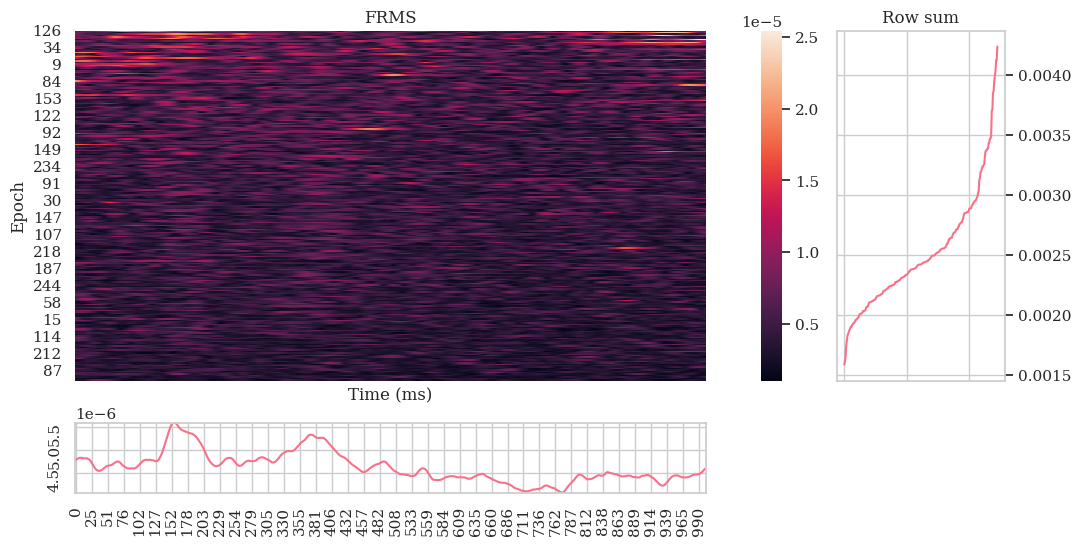

In [5]:
frms_tg = FRMS(epochs["Target"])
frms_tg.plot()

# Treat all sessions at once

Spatial and Temporal Filters converged.


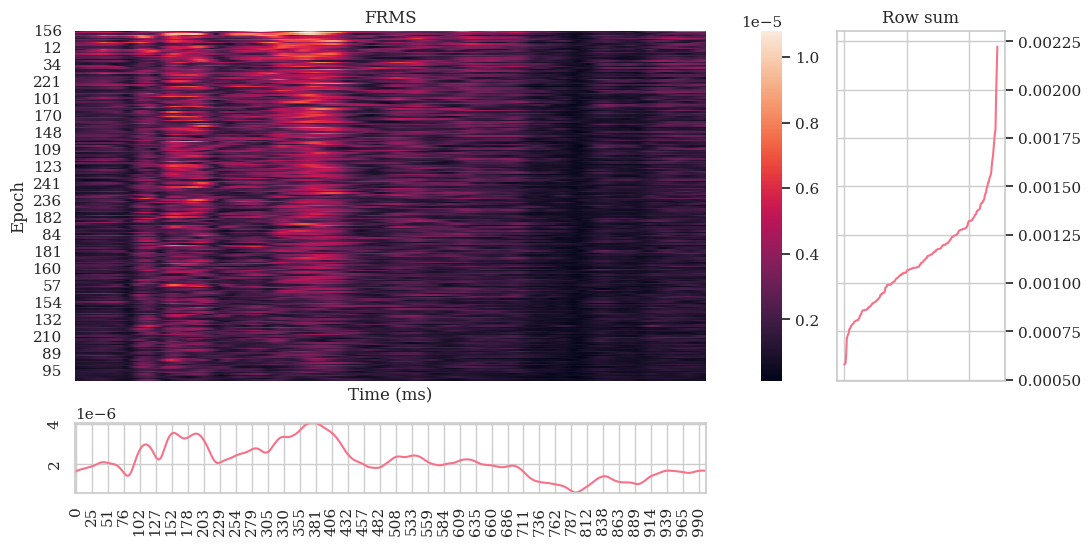

In [6]:
# lagger = Lagger(epochs["Target"])
# lag_corrected_epochs_tg = lagger.compute_and_correct_lags()
# frms = FRMS(lag_corrected_epochs_tg)

# #Average filtered and lag-corrected non-target FRMS 

# lagger = Lagger(epochs["NonTarget"])
# lag_corrected_epochs_ntg = lagger.compute_and_correct_lags()
# frms_ntg = FRMS(lag_corrected_epochs_ntg)

# lag_corrected_epochs = mne.concatenate_epochs([lag_corrected_epochs_tg, lag_corrected_epochs_ntg])

lag_corrected_epochs = epochs

alt_filter = AltFilters(lag_corrected_epochs, p=10)
lagged_filtered_epochs, _ = alt_filter.fit_and_apply(class_="Target", plot_it=False)

frms_tg = FRMS(lagged_filtered_epochs["Target"])
frms_tg.plot()

Lag corection iteration num:  0
Lag corection iteration num:  0
Adding metadata with 3 columns
2528 matching events found
No baseline correction applied
Spatial and Temporal Filters converged.


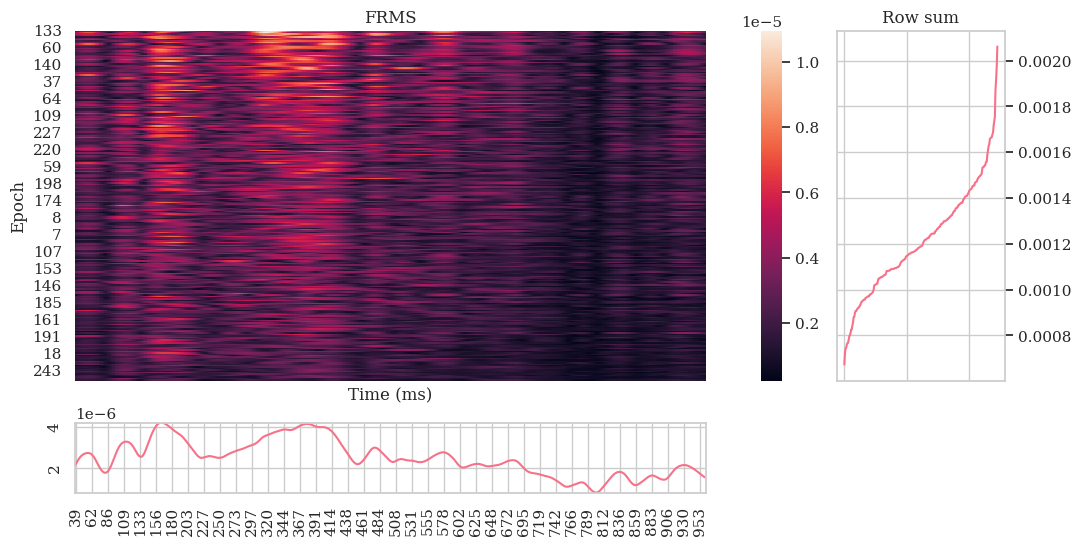

In [14]:
#now with lag and filter

lagger = Lagger(epochs["Target"])
lag_corrected_epochs_tg = lagger.compute_and_correct_lags()
frms = FRMS(lag_corrected_epochs_tg)

#Average filtered and lag-corrected non-target FRMS 

lagger = Lagger(epochs["NonTarget"])
lag_corrected_epochs_ntg = lagger.compute_and_correct_lags()
frms_ntg = FRMS(lag_corrected_epochs_ntg)

lag_corrected_epochs = mne.concatenate_epochs([lag_corrected_epochs_tg, lag_corrected_epochs_ntg])

alt_filter = AltFilters(lag_corrected_epochs, p=10)
lagged_filtered_epochs, _ = alt_filter.fit_and_apply(class_="Target", plot_it=False)

frms_tg = FRMS(lagged_filtered_epochs["Target"])
frms_tg.plot()

Lag corection iteration num:  0
Lag corection iteration num:  0
Adding metadata with 3 columns
2528 matching events found
No baseline correction applied
Spatial and Temporal Filters converged.


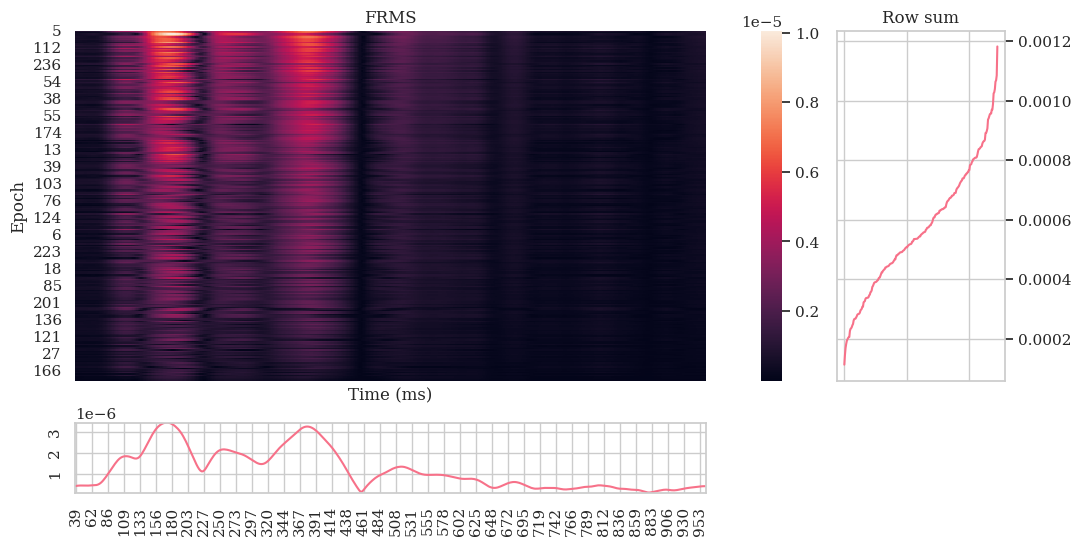

In [17]:
#now with lag and filter

lagger = Lagger(epochs["Target"])
lag_corrected_epochs_tg = lagger.compute_and_correct_lags()
frms = FRMS(lag_corrected_epochs_tg)

#Average filtered and lag-corrected non-target FRMS 

lagger = Lagger(epochs["NonTarget"])
lag_corrected_epochs_ntg = lagger.compute_and_correct_lags()
frms_ntg = FRMS(lag_corrected_epochs_ntg)

lag_corrected_epochs = mne.concatenate_epochs([lag_corrected_epochs_tg, lag_corrected_epochs_ntg])

alt_filter = AltFilters(lag_corrected_epochs, p=2)
lagged_filtered_epochs, _ = alt_filter.fit_and_apply(class_="Target", plot_it=False)

frms_tg = FRMS(lagged_filtered_epochs["Target"])
frms_tg.plot()

# Isolate a single session of the above

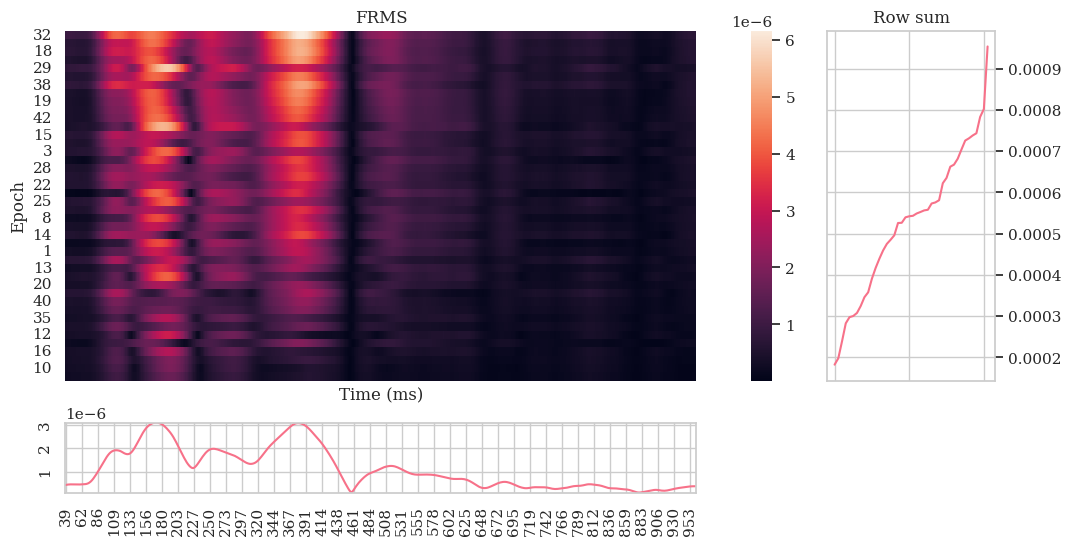

In [18]:
session = "0"
treated_epochs_session = lagged_filtered_epochs[lagged_filtered_epochs.metadata.session == session]

frms_tg = FRMS(treated_epochs_session["Target"])
frms_tg.plot()

# Now treat single session isolatedly

Lag corection iteration num:  0
Lag corection iteration num:  0
Adding metadata with 3 columns
336 matching events found
No baseline correction applied
Spatial and Temporal Filters converged.


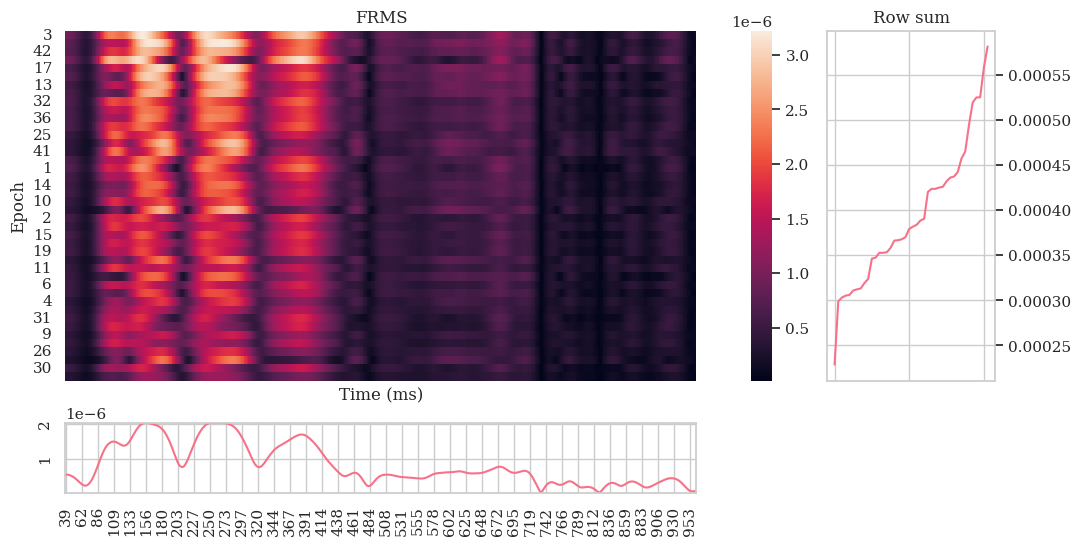

In [16]:
epochs_session = epochs[epochs.metadata.session == session]

lagger = Lagger(epochs_session["Target"])
lag_corrected_epochs_tg = lagger.compute_and_correct_lags()
frms = FRMS(lag_corrected_epochs_tg)

#Average filtered and lag-corrected non-target FRMS 

lagger = Lagger(epochs_session["NonTarget"])
lag_corrected_epochs_ntg = lagger.compute_and_correct_lags()
frms_ntg = FRMS(lag_corrected_epochs_ntg)

treated_epochs_session = mne.concatenate_epochs([lag_corrected_epochs_tg, lag_corrected_epochs_ntg])


alt_filter = AltFilters(treated_epochs_session, p=2)
lagged_filtered_epochs, _ = alt_filter.fit_and_apply(class_="Target", plot_it=False)

frms_tg = FRMS(lagged_filtered_epochs["Target"])
frms_tg.plot()